# <font color='lightblue'> A Historical Analysis Of The Effects U.S. Presidencies Have On Home Sales</font>
#### <font color='lightblue'>DATA-720 Final Project // Adam Green</font>


## <font color='lightyellow'>Introduction:</font>

Over the history of U.S. Presidencies and Federal Reserve policies, Fed interest
rates and home sales/home sale prices have fluctuated routinely and, in many cases, have seen drastic
changes (both positively and negatively). Although there is a formal independence between
these two bodies of politics/economics, global events and presidential/political party policies
play a role in how the markets and the economy at large behave. 

<ins>Research Objective:</ins>  

My project is focused on exploring the relationship between Presidencies and Federal Reserve
Interest Rates. My hypothesis is that there is a correlation between
these characteristics. Additionally, what I will explore the relationship, if there is any,
between Presidencies and House Sales/House Price fluctuations. 

<ins>Hypothesis:</ins>

There is likley a correlation between Presidents/political parties, the Fed Rate, and their effects on the number of homes sold and the average sale price of homes sold.

<ins>Impact/Implications</ins>

Understanding if and how politics may affect interest rates, and potentially home sales, would be
helpful in better understanding potential future trends to make more informed
decisions regarding when and how to purchase consumer goods and possibly homes.  If there is a correlation, machine learning models could help make helpful predictions in home sale prices and fed rates based current/future events.  

State your hypothesis or research objective, explain the relevance or importance of your topic, and/or describe potential uses / applications of your findings, or what future investigations your work might inform.

## <font color='lightyellow'>Methods:</font>

1. Review the data stats to understand its high-level stats & identify the need for data cleaning.
2. Conduct a compilation of data cleaning & EDA to format my data in a consistent and usable way and then visualize it to identify possible trends/correlations.
3. Create models with scikit learn to test predictions.
4. Assess and summarize model output and performance
5. Capture my project findings and next step suggestions.

More notes and summaries are provided below to help keep the code logical and easy to read.

## <font color='lightyellow'>Imports:</font>

In [1023]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## <font color='lightyellow'>Data:</font>

<ins>Data Sources:</ins>

1. ***Federal Reserve Interest Rates, 1954 - Present*** 

* <ins>Citation/Link:</ins> https://www.kaggle.com/datasets/federalreserve/interest-rates
    
* <ins>Name of set in final project:</ins> historical_fed_rate_data

* <ins>Description:</ins>  Contains Federal Reserve Rates, along with other Federal Reserve metrics such as target rates, inflation rates, and unemployment rates from 1954 - 2017

2. ***New One Family Houses Sold: United States***
* <ins>Citatation/Link:</ins> U.S. Census Bureau and U.S. Department of Housing and Urban Development, New One Family Houses Sold: United States [HSN1F], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/HSN1F, July 24, 2024. 

* <ins>Name of set in final project:</ins> one_fam_houses_sold_data

* <ins>Description:</ins> Contains the number of one family houses sold (in thousands) in the U.S. (monthly) from 1963 - 2024.

3. ***Average Sales Price of Houses Sold for the United States*** 
 
* <ins>Citatation/Link:</ins> U.S. Census Bureau and U.S. Department of Housing and Urban Development, Average Sales Price of Houses Sold for the United States [ASPUS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/ASPUS, July 24, 2024.

* <ins>Name of set in final project:</ins> avg_sales_price_data

* <ins>Description:</ins> Contains the average sales price (in dollars) of houses sold in the U.S. from 1963 - 2024.

4. ***Average Sales Price of Houses Sold for the United States***
* <ins>Citatation/Link:</ins> https://www.kaggle.com/datasets/harshitagpt/us-presidents

* <ins>Name of set in final project:</ins> us_presidents_terms_data

* <ins>Description:</ins> Contains U.S. Presidents as several key statistics of their tenure, including start date, end date, VP, and political party, from 1789-2017.


In [1024]:
historical_fed_rate_data = pd.read_csv('fed_rates_1954_present.csv')
# https://www.kaggle.com/datasets/federalreserve/interest-rates

one_fam_houses_sold_data = pd.read_csv('one_fam_houses_sold.csv')
# U.S. Census Bureau and U.S. Department of Housing and Urban Development, New One Family Houses Sold: United States [HSN1F], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/HSN1F, July 24, 2024. 

avg_sales_price_data = pd.read_csv('avg_sales_price.csv')
# U.S. Census Bureau and U.S. Department of Housing and Urban Development, Average Sales Price of Houses Sold for the United States [ASPUS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/ASPUS, July 24, 2024. 

us_presidents_terms_data = pd.read_csv('us_presidents.csv')
# https://www.kaggle.com/datasets/harshitagpt/us-presidents

## <font color='lightyellow'>Data Summary Stats, Quality, and Completeness:</font>

<ins>Historical_Fed_rate_Data Dataset:</ins>

In [1025]:
# Showing a preview of the raw dataset:
historical_fed_rate_data.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


In [1026]:
historical_fed_rate_data.describe()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
count,904.000000,904.000000,904.000000,462.000000,103.000000,103.000000,752.000000,250.000000,752.000000,710.000000
mean,1986.680310,6.598451,3.598451,5.658415,0.308252,0.058252,4.910997,3.138000,5.979122,3.733380
std,17.172843,3.471963,6.791079,2.553891,0.140917,0.140917,3.611431,3.598521,1.567641,2.573637
min,1954.000000,1.000000,1.000000,1.000000,0.250000,0.000000,0.070000,-10.000000,3.400000,0.600000
25%,1973.000000,4.000000,1.000000,3.750000,0.250000,0.000000,2.427500,1.400000,4.900000,2.000000
50%,1987.500000,7.000000,1.000000,5.500000,0.250000,0.000000,4.700000,3.100000,5.700000,2.800000
75%,2001.000000,10.000000,1.000000,7.750000,0.250000,0.000000,6.580000,4.875000,7.000000,4.700000
max,2017.000000,12.000000,31.000000,11.500000,1.000000,0.750000,19.100000,16.500000,10.800000,13.600000


In [1027]:
historical_fed_rate_data.isna().sum()
# Notice, there are various columns that I will not be using in this analysis and will remove in the proceeding data cleaning section.  Additionally, I will convet my dates to a datetime format.

Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       442
Federal Funds Upper Target      801
Federal Funds Lower Target      801
Effective Federal Funds Rate    152
Real GDP (Percent Change)       654
Unemployment Rate               152
Inflation Rate                  194
dtype: int64

<ins>One_Fam_Houses_Sold_Data Dataset:</ins>

In [1028]:
# Showing a preview of the raw dataset:
one_fam_houses_sold_data.head()

,DATE,HSN1F
0,1963-01-01,591.0
1,1963-02-01,464.0
2,1963-03-01,461.0
3,1963-04-01,605.0
4,1963-05-01,586.0


In [1029]:
one_fam_houses_sold_data.describe()

,HSN1F
count,737.000000
mean,655.647218
std,207.091670
min,270.000000
25%,516.000000
50%,630.000000
75%,763.000000
max,1389.000000


In [1030]:
one_fam_houses_sold_data.isna().sum()
# This data set, along with the following (avg_sales_price_data) are very clean with no na values, however, I will still convert the dates to date time format to ensure consistency in my dates across my project (in the proceeding sections).

DATE     0
HSN1F    0
dtype: int64

<ins>Avg_Sales_Price_Data Dataset:</ins>

In [1031]:
# Showing a preview of the raw dataset:
avg_sales_price_data.head()

,DATE,ASPUS
0,1963-01-01,19300.0
1,1963-04-01,19400.0
2,1963-07-01,19200.0
3,1963-10-01,19600.0
4,1964-01-01,19600.0


In [1032]:
avg_sales_price_data.describe()

,ASPUS
count,245.000000
mean,183449.387755
std,136234.993645
min,19200.000000
25%,61600.000000
50%,151200.000000
75%,286300.000000
max,525100.000000


In [1033]:
avg_sales_price_data.isna().sum()
# As mentioned above, this data set is very clean with no na values, however, I will still convert the dates to date time format to ensure consistency in my dates across my project (in the proceeding sections).

DATE     0
ASPUS    0
dtype: int64

In [1034]:
us_presidents_terms_data.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [1035]:
us_presidents_terms_data.describe()

,Unnamed: 0,S.No.
count,45.000000,45.000000
mean,22.000000,23.000000
std,13.133926,13.133926
min,0.000000,1.000000
25%,11.000000,12.000000
50%,22.000000,23.000000
75%,33.000000,34.000000
max,44.000000,45.000000


In [1036]:
us_presidents_terms_data.isna().sum()
# This is also a pretty clean data set, with only 1 na value, however, most of this data will be irrelevant to my project.  I will remove all columns except the President and their start/end dates, which once again I will convert to date time format to keep consistent.

Unnamed: 0    0
S.No.         0
start         0
end           1
president     0
prior         0
party         0
vice          0
dtype: int64

## <font color='lightyellow'>EDA:</font>

In [1037]:
historical_fed_rate_data

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


In [1038]:
# Creating a new column, named 'Date', to convert the current 'Year', 'Month', 'Date' columns to a combined date time data type to ensure consistency across project.
historical_fed_rate_data['Date']=pd.to_datetime(historical_fed_rate_data[['Year', 'Month', 'Day']])

# Dropping all of the irrelevant/unneeded columns in my dataset
historical_fed_rate_data = historical_fed_rate_data.drop(columns=['Year', 'Month', 'Day', 'Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target', 'Real GDP (Percent Change)', 'Unemployment Rate', 'Inflation Rate'])

# Removing all na values across the data set
historical_fed_rate_data.dropna(inplace=True)

# Filtering only values that fall within year range (1963 - 2017)
historical_fed_rate_data = historical_fed_rate_data[(historical_fed_rate_data['Date'].dt.year >= 1963) & (historical_fed_rate_data['Date'].dt.year <= 2017)]

# Lastly, resetting my index 
historical_fed_rate_data.reset_index(drop=True, inplace=True)

historical_fed_rate_data

,Effective Federal Funds Rate,Date
0,2.92,1963-01-01
1,3.00,1963-02-01
2,2.98,1963-03-01
3,2.90,1963-04-01
4,3.00,1963-05-01
...,...,...
645,0.40,2016-10-01
646,0.41,2016-11-01
647,0.54,2016-12-01
648,0.65,2017-01-01


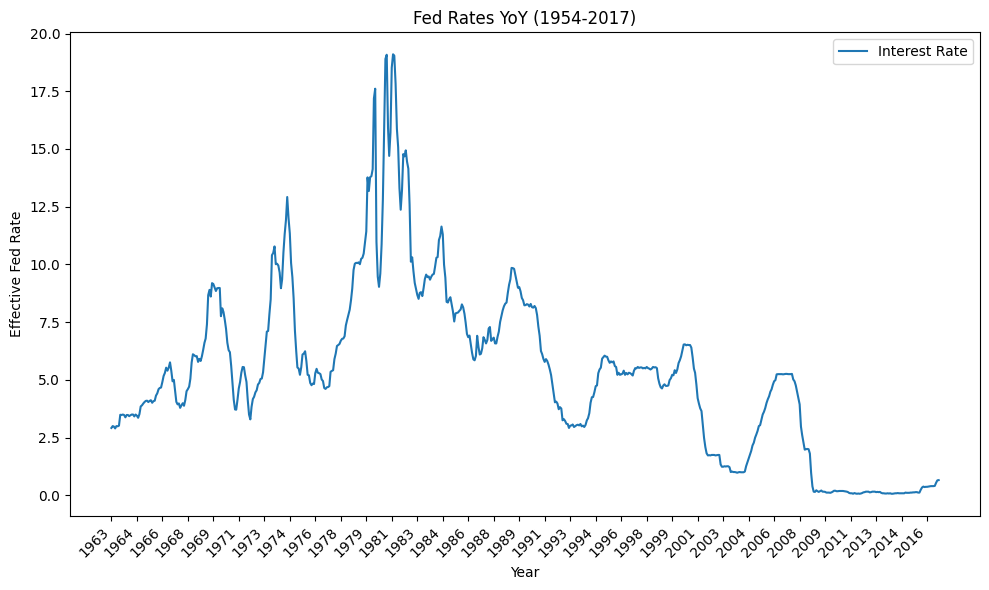

In [1039]:
plt.figure(figsize=(10, 6))

x = historical_fed_rate_data['Date']
y = historical_fed_rate_data['Effective Federal Funds Rate']

plt.plot(x, y, label='Interest Rate')
plt.title('Fed Rates YoY (1954-2017)')
plt.xlabel('Year')
plt.ylabel('Effective Fed Rate')
plt.legend()
plt.xticks(x[::20], [date.strftime('%Y') for date in x[::20]], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [1040]:
# Start by removing all irrelevant data from my raw data set
us_presidents_terms_data.drop(['Unnamed: 0', 'S.No.', 'prior', 'vice'], axis=1, inplace=True)

# Replacing missing/incorrect values for last Presidents Obama and Trump end term dates.  This raw set did not include President Biden's presidency and I did not include it because I am using 1963-2017 as my project date range as this range was available for all data sets.  Hence there is no need too add his presidency.
us_presidents_terms_data.loc[43, 'end'] = 'January 20, 2017'
us_presidents_terms_data.loc[44, 'end'] = 'January 20, 2021'

# Converting the dates to only years since the months/days won't be needed for my project
us_presidents_terms_data['start'] = pd.to_datetime(us_presidents_terms_data['start']).dt.year
us_presidents_terms_data['end'] = pd.to_datetime(us_presidents_terms_data['end']).dt.year

# To mitigate overlap issues with the presidents overlapping in January of each year, I subtracted their tenure end year by 1 as this 3 week overlap would have minimal effect on the overall data analysis.
us_presidents_terms_data['end'] = us_presidents_terms_data['end']-1

# Filtering only the presidents that align with my fed rate years (1961 - 2017)
us_presidents_terms_data = us_presidents_terms_data[(us_presidents_terms_data['end'] >= 1963) & (us_presidents_terms_data['start'] <= 2017)]

# Lastly, resetting the index
us_presidents_terms_data.reset_index(drop=True, inplace=True)

us_presidents_terms_data

,start,end,president,party
0,1963,1968,Lyndon B. Johnson,Democratic
1,1969,1973,Richard Nixon,Republican
2,1974,1976,Gerald Ford,Republican
3,1977,1980,Jimmy Carter,Democratic
4,1981,1988,Ronald Reagan,Republican
5,1989,1992,George H. W. Bush,Republican
6,1993,2000,Bill Clinton,Democratic
7,2001,2008,George W. Bush,Republican
8,2009,2016,Barack Obama,Democratic
9,2017,2020,Donald Trump,Republican


In [1041]:
# I am defining a function that produces a plotly plot comparing __ dataset (argument passed to function) with presidential terms.  I want to be able to visualize and compare different datasets with presidential terms and instead of repeating code numerous times, this will save a lot of code.

def presidential_comparison_plot (comp_data_set_x, comp_data_set_y, plt_title, y_axis_label):

    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(
        go.Scatter(x=comp_data_set_x, 
                y=comp_data_set_y,
                name=y_axis_label),
        secondary_y=False,
    )

    terms = []
    for _, row in us_presidents_terms_data.iterrows():
        color = 'blue' if row['party'] == 'Democratic' else 'red'
        terms.append(go.Bar(
            x=[row['start'], row['end']],
            y=[2, 2],
            name=row['president'],
            marker_color=color,
            opacity=0.2,
            hoverinfo='name+x',
        ))

    for term in terms:
        fig.add_trace(term, secondary_y=True)

    fig.update_layout(
        title_text=plt_title,
        xaxis_title="Year",
        barmode='overlay',
        bargap=0,
        legend_title="Legend",
        hovermode="x unified",
    )
    xaxis_ticks = list(range(1963, 2018, 1))
    fig.update_xaxes(row=1, col=1, tickvals=xaxis_ticks, ticktext=[str(year) for year in xaxis_ticks], tickangle=45)

    fig.update_yaxes(title_text=y_axis_label, secondary_y=True, 
                    range=[0, 1.5], showticklabels=False)

    fig.show()

### <font color='lightblue'>Initial Analysis (Plot Below):  Presidential Terms Compared to Fed Rates</font>

From this initial analysis, I don't see a definitive correlation.  There does appear that possibly there are relative higher rates correlated to Republican terms, but it is not clear.

In [1042]:
presidential_comparison_plot(historical_fed_rate_data['Date'], historical_fed_rate_data['Effective Federal Funds Rate'], "Fed Rates YoY (1963-2017) with Presidential Terms","Fed Rate")

In [1043]:
# Minor - changing default 'DATE' column name in the one family houses sold dataset to just 'Date' to keep it consistent with President's dataframe.
one_fam_houses_sold_data.rename(columns={'DATE': 'Date'}, inplace=True)

# Changing date from int to date time type for consistency across project.
one_fam_houses_sold_data["Date"] = pd.to_datetime(one_fam_houses_sold_data["Date"])

# Filtering the houses sold dataset to only include those rwos between 1963 & 2017
one_fam_houses_sold_data = one_fam_houses_sold_data[(one_fam_houses_sold_data['Date'].dt.year >= 1963) & (one_fam_houses_sold_data['Date'].dt.year <= 2017)]
one_fam_houses_sold_data


,Date,HSN1F
0,1963-01-01,591.0
1,1963-02-01,464.0
2,1963-03-01,461.0
3,1963-04-01,605.0
4,1963-05-01,586.0
...,...,...
655,2017-08-01,556.0
656,2017-09-01,637.0
657,2017-10-01,626.0
658,2017-11-01,711.0


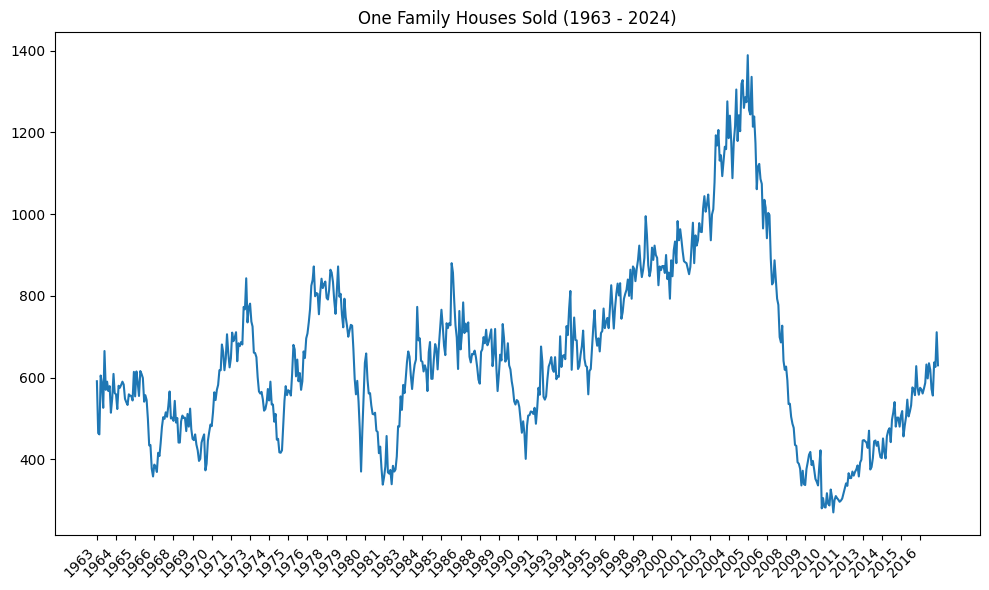

In [1044]:
# Basic plot of the houses_sold data set to visualize it.

plt.figure(figsize=(10, 6))

x = one_fam_houses_sold_data["Date"]
y = one_fam_houses_sold_data["HSN1F"]


plt.plot(x, y, label='One Family Houses Sold')
plt.title('One Family Houses Sold (1963 - 2024)')
plt.xticks(x[::15], [date.strftime('%Y') for date in x[::15]], rotation=45, ha='right')

plt.tight_layout()
plt.show()

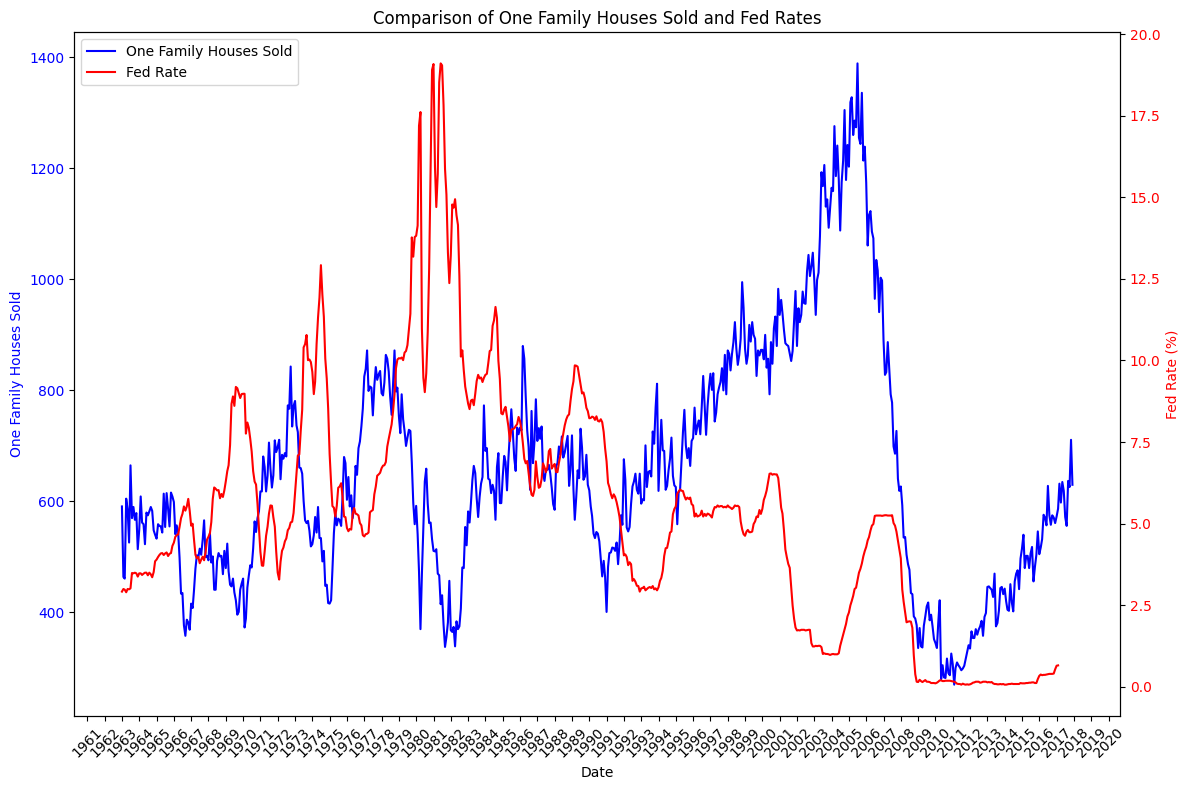

In [1045]:
# Now let's visualize the relationship between the fed rate & houses sold.  As you'll see, there is an general inverse relationship between these two data sets, which to no surprise, reflects that at periods where the fed rate is higher, homes sold decreases, and vice versa.

x = one_fam_houses_sold_data["Date"]
y = one_fam_houses_sold_data["HSN1F"]

x2 = historical_fed_rate_data['Date']
y2 = historical_fed_rate_data['Effective Federal Funds Rate']

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(x, y, label='One Family Houses Sold', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('One Family Houses Sold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45, labelrotation=45)

ax2 = ax1.twinx()
ax2.plot(x2, y2, label='Fed Rate', color='red')
ax2.set_ylabel('Fed Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of One Family Houses Sold and Fed Rates')

years = mdates.YearLocator(1)  
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_format)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


### <font color='lightblue'>Initial Analysis:  Presidential Terms Compared to One Family Homes Sold (Plot Below)</font>

Although I don't see any trends regarding home purchases to one party compared to another, it does seem like there is a historical trend where there is generally a decrease in sales during new elections.  In most cases prior to the early 1990s, we see a decrease in home sales when there is an election.

In [1046]:
presidential_comparison_plot(one_fam_houses_sold_data["Date"], one_fam_houses_sold_data["HSN1F"], 'Comparison of One Family Houses Sold by Presidency/Party', 'One Family Houses Sold')


### <font color='lightblue'>Average Home Sales Price in U.S. Data Analysis</font>


In [1047]:
# Changing default 'DATE' column name in the one family houses sold dataset to just 'Date' to keep it consistent with President's dataframe.
avg_sales_price_data.rename(columns={'DATE': 'Date'}, inplace=True)

# Changing date from int to date time type for consistency across project.
avg_sales_price_data["Date"] = pd.to_datetime(avg_sales_price_data["Date"])

# Filtering the houses sold dataset to only include those rwos between 1963 & 2017
avg_sales_price_data = avg_sales_price_data[(avg_sales_price_data['Date'].dt.year >= 1963) & (avg_sales_price_data['Date'].dt.year <= 2017)]
avg_sales_price_data


,Date,ASPUS
0,1963-01-01,19300.0
1,1963-04-01,19400.0
2,1963-07-01,19200.0
3,1963-10-01,19600.0
4,1964-01-01,19600.0
...,...,...
215,2016-10-01,364900.0
216,2017-01-01,374800.0
217,2017-04-01,376900.0
218,2017-07-01,373200.0


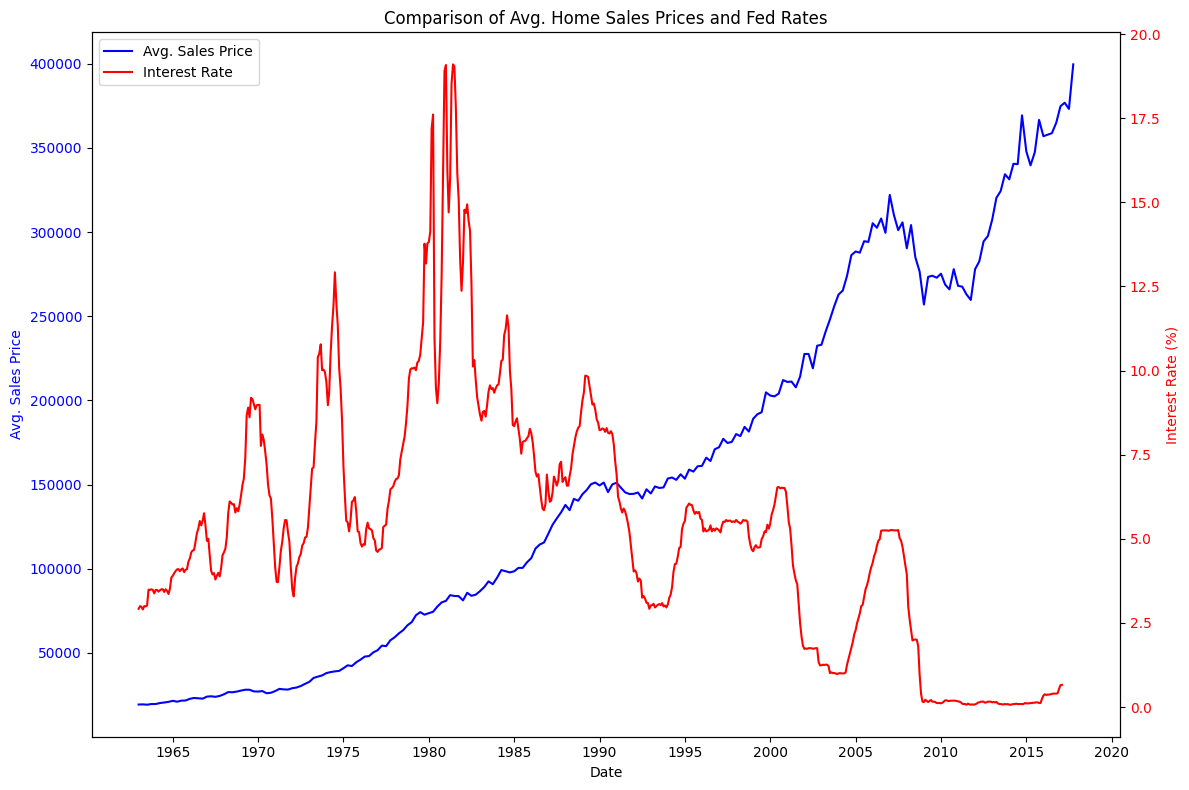

In [1048]:
# First, visually analyzing Fed Rates to Average price of house sold from 1963-2017.  Once again, unsurprisingly, there is an inverse relationship between the fed rate and the average price of homes sold.  

x3 = avg_sales_price_data["Date"]
y3 = avg_sales_price_data["ASPUS"]

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(x3, y3, label='Avg. Sales Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg. Sales Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(x2, y2, label='Interest Rate', color='red')
ax2.set_ylabel('Interest Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Avg. Home Sales Prices and Fed Rates')

years = mdates.YearLocator(5)  
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45, ha='right')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


### <font color='lightblue'>Initial Analysis:  Presidential Terms Compared to Average Sales Price of Homes Sold (Plot Below)</font>

Although Average Price of Homes Sold (ASPUS) clearly has linear plot, it appears completely independent from Presidential party.  The data shows that home sales prices have continuously increased historically generally.  The dip from ~2007 - 2011 could possibly be attributed to the 2008-2009 housing marketing crash.  Aside from that period, prices have generally risen.

In [1049]:
presidential_comparison_plot(avg_sales_price_data["Date"], avg_sales_price_data["ASPUS"], 'Comparison of Avg. Home Sales Prices By Presidential Term', 'Avg. Sales Price')

## <font color='lightblue'>Model Development:</font>

In [1050]:
# In order to be able to train a model, I first need to do some more data cleaning.  I'm going to clone my historical_fed_rate data set to create a new object mapping, so I don't effect my previous data.

# Creating a copy of the historical_fed_rate_data data set.
historical_fed_rate_data_model = historical_fed_rate_data.copy()

# Filtering the dataset to only pull the quarterly dates' rows.  This is to have them align with the ASPUS data set.
historical_fed_rate_data_model = historical_fed_rate_data_model[historical_fed_rate_data_model['Date'].dt.strftime('%m-%d').isin(['01-01', '04-01', '07-01', '10-01'])]

# Comparing the fed rate dataset w/ the ASPUS data set.  As can be seen, my APSUS has more rows.
print(len(historical_fed_rate_data_model['Date']))
print(len(avg_sales_price_data['Date']))

# To fix this, and create my new data set for the model training, I am using the merge function here to merge all rows between the two datasets where they match dates.
pred_model_data = pd.merge(historical_fed_rate_data_model,avg_sales_price_data, on='Date')
pred_model_data = pd.merge(pred_model_data,one_fam_houses_sold_data, on='Date')

# Next, I create a new column, for political party of the president in office for the year, and then map over the us_presidents_terms_data to populate the correct value (Republican/Democrat) based on the year(s).
pred_model_data['Party'] = None

for index, row in us_presidents_terms_data.iterrows():
    start_year = row['start']
    end_year = row['end']
    party = row['party']
    
    pred_model_data.loc[(pred_model_data['Date'].dt.year >= start_year) & (pred_model_data['Date'].dt.year <= end_year), 'Party'] = party

# To resolve a minor formatting issue, I am changing 'Democratic' (as labeled in the original us_presidents dataset) to just 'Democrat'
pred_model_data['Party'] = pred_model_data['Party'].replace('Democratic', 'Democrat')

pred_model_data.tail()
# As can be seen, my rows align now...

217
220


,Effective Federal Funds Rate,Date,ASPUS,HSN1F,Party
212,0.34,2016-01-01,357000.0,505.0,Democrat
213,0.37,2016-04-01,357900.0,576.0,Democrat
214,0.39,2016-07-01,358800.0,628.0,Democrat
215,0.40,2016-10-01,364900.0,575.0,Democrat
216,0.65,2017-01-01,374800.0,573.0,Republican


In [1051]:
# In order to include party into my model to conduct Linear Regression, I need to convert to int.  I am using pandas built-in get_dummies function for this.
one_hot_encoded = pd.get_dummies(pred_model_data['Party'], prefix='is').astype(int)

# And now adding the newly created encoded columns/values back into my model dataset...
pred_model_data = pred_model_data.join(one_hot_encoded)

pred_model_data.head(25)

,Effective Federal Funds Rate,Date,ASPUS,HSN1F,Party,is_Democrat,is_Republican
0,2.92,1963-01-01,19300.0,591.0,Democrat,1,0
1,2.90,1963-04-01,19400.0,605.0,Democrat,1,0
2,3.02,1963-07-01,19200.0,665.0,Democrat,1,0
3,3.50,1963-10-01,19600.0,567.0,Democrat,1,0
4,3.48,1964-01-01,19600.0,549.0,Democrat,1,0
5,3.47,1964-04-01,20200.0,559.0,Democrat,1,0
6,3.42,1964-07-01,20500.0,575.0,Democrat,1,0
7,3.36,1964-10-01,20900.0,583.0,Democrat,1,0
8,3.90,1965-01-01,21500.0,533.0,Democrat,1,0
9,4.09,1965-04-01,21000.0,555.0,Democrat,1,0


In [1052]:
# To preserve my original model data set integrity, I am creating a copy
pred_model_data_1 = pred_model_data.copy()

# Predicting the ASPUS based on features: 'Effective Federal Funds Rate', 'HSN1F', 'is_Democrat', 'is_Republican'
x_mod_1 = pred_model_data_1[['Effective Federal Funds Rate', 'HSN1F', 'is_Democrat', 'is_Republican']]
y_mod_1 = pred_model_data_1[['ASPUS']]

# Exploring predictions of federal funds rate based on political party
# x_mod_1 = pred_model_data_1[['is_Democrat', 'is_Republican']]
# y_mod_1 = pred_model_data_1[['Effective Federal Funds Rate']]

# Creating my x / y training and test sets
x_mod_train_1, x_mod_test_1, y_mod_train_1, y_mod_test_1 = train_test_split(x_mod_1, y_mod_1, test_size=0.2, random_state=0)

# Creating and fitting my model
model_1 = LinearRegression()
model_1.fit(x_mod_train_1, y_mod_train_1)
y_pred_1 = model_1.predict(x_mod_test_1)

# In order to get a better understanding of my RMSE, I am normalizing my RMSE by dividing it by my mean.
RMSE_1 = np.sqrt(metrics.mean_squared_error(y_mod_test_1, y_pred_1))
mean_target_1 = y_mod_1['ASPUS'].mean()
RMSE_1_normalized = RMSE_1/mean_target_1

print('Mean Absolute Error:', metrics.mean_absolute_error(y_mod_test_1, y_pred_1))
print('Mean Squared Error:', metrics.mean_squared_error(y_mod_test_1, y_pred_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_mod_test_1, y_pred_1)))
print('RMSE_1 Normalized:', RMSE_1_normalized)
print('R^2 Score:', metrics.r2_score(y_mod_test_1, y_pred_1))

print('Coefficients:', model_1.coef_)

Mean Absolute Error: 59919.09849867125
Mean Squared Error: 6007520499.813061
Root Mean Squared Error: 77508.19633956825
RMSE_1 Normalized: 0.513153669135513
R^2 Score: 0.3379885479625877
Coefficients: [[-16682.82120553     61.41325322  -3226.37945743   3226.37945743]]


In [1053]:
# Creating some sample prediction inputs
pred_x_1 = np.array([[6.2, 400, 1, 0],   
                  [6.2, 400, 0, 1]]) 

# and now predicting the ASPUS based on the above sample inputs (6.2% fed rate with Republican party & then 6.2% fed rate with Democrat Party)
pred_y_1 = model_1.predict(pred_x_1)

for i in range(len(pred_x_1)):
    print(f"Prediction for Average House Sold Price at {pred_x_1[i][0]}% fed rate: ${pred_y_1[i][0]:.2f}")

Prediction for Average House Sold Price at 6.2% fed rate: $117474.29
Prediction for Average House Sold Price at 6.2% fed rate: $123927.05


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



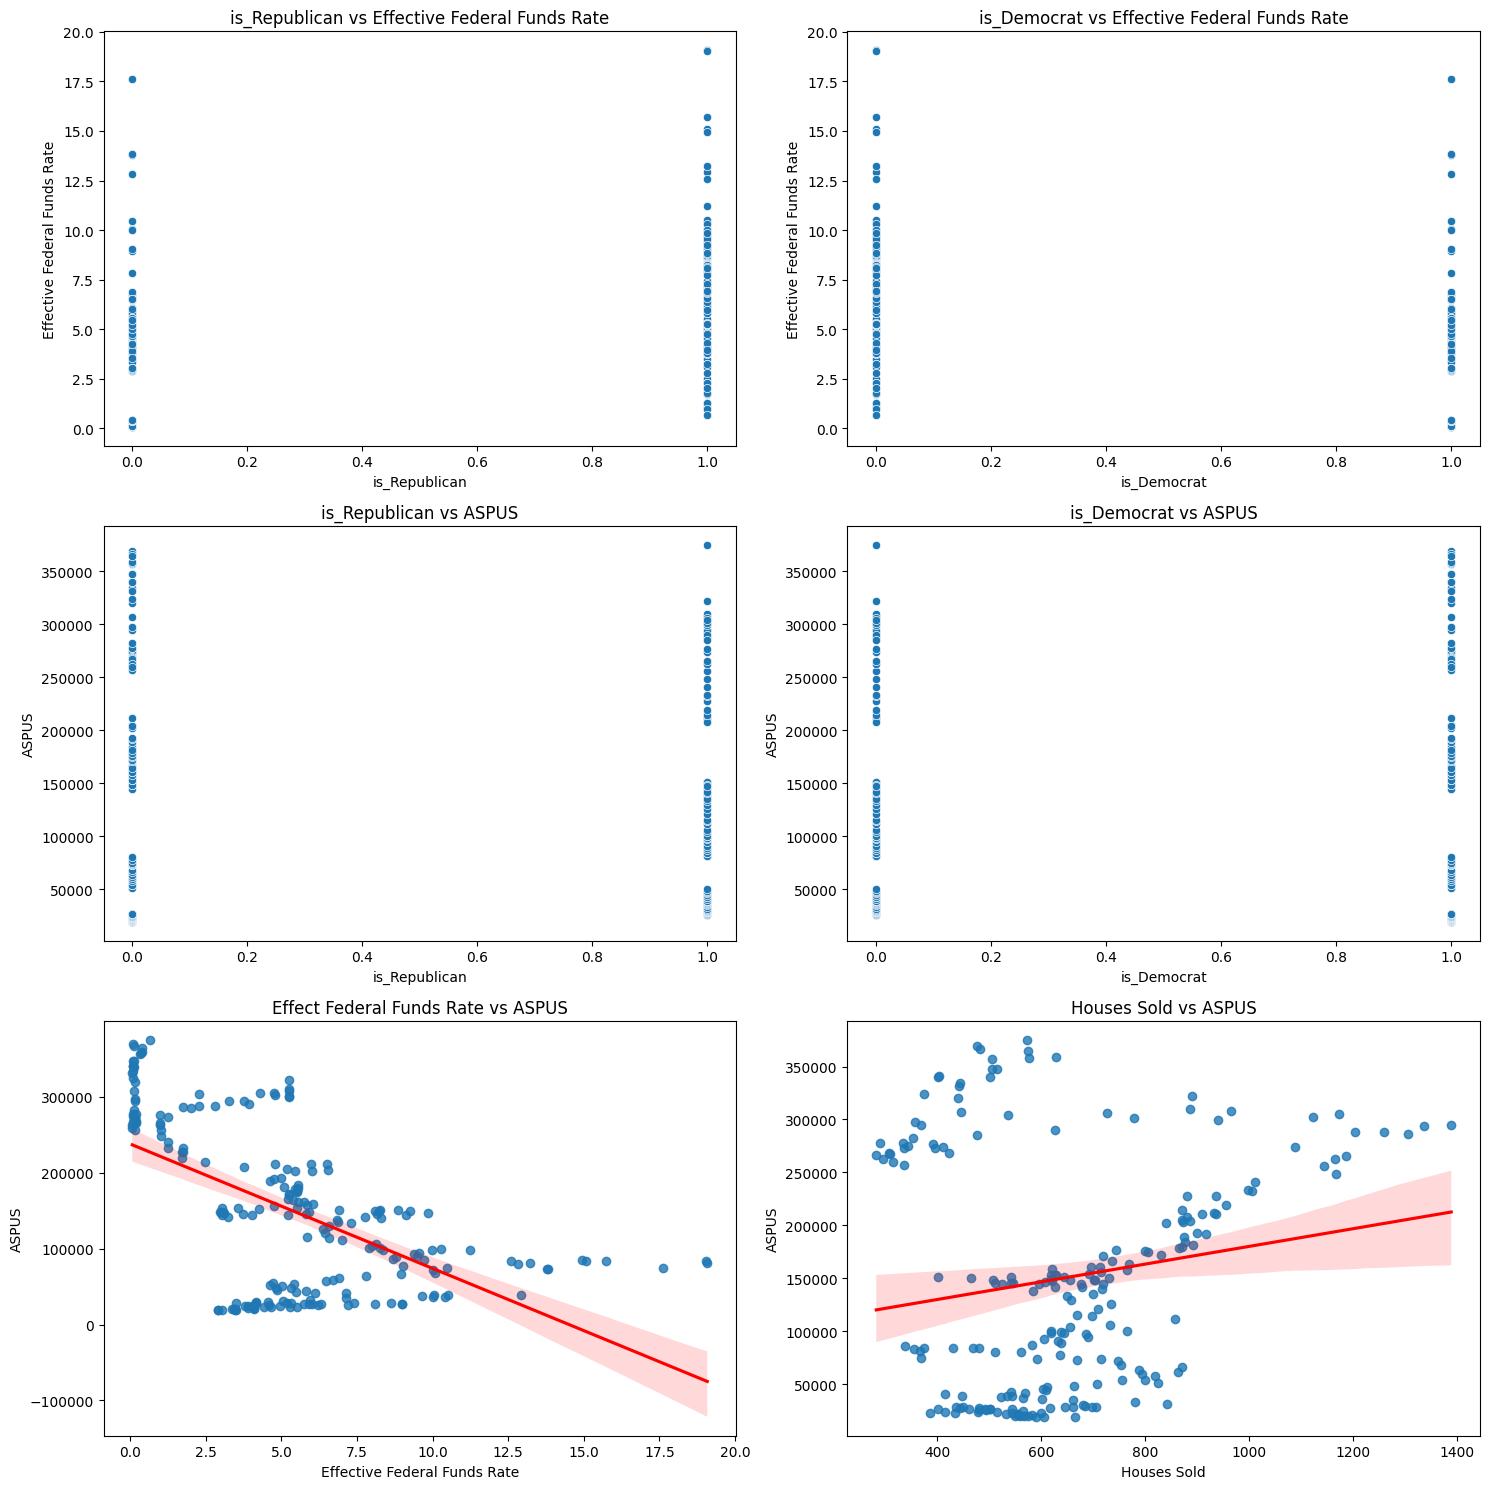

In [1054]:
# Next, I want to visualize my model outputs...

pred_model_data_1['Predicted'] = model_1.predict(x_mod_1)

fig, axes = plt.subplots(3,2, figsize=(15,15))

sns.scatterplot(x='is_Republican', y='Effective Federal Funds Rate', data=pred_model_data_1, ax=axes[0,0])
axes[0, 0].set_title('is_Republican vs Effective Federal Funds Rate')
axes[0, 0].set_xlabel('is_Republican')
axes[0, 0].set_ylabel('Effective Federal Funds Rate')

sns.scatterplot(x='is_Democrat', y='Effective Federal Funds Rate', data=pred_model_data_1, ax=axes[0, 1])
axes[0, 1].set_title('is_Democrat vs Effective Federal Funds Rate')
axes[0, 1].set_xlabel('is_Democrat')
axes[0, 1].set_ylabel('Effective Federal Funds Rate')

sns.scatterplot(x='is_Republican', y='ASPUS', data=pred_model_data_1, ax=axes[1, 0])
axes[1, 0].set_title('is_Republican vs ASPUS')
axes[1, 0].set_xlabel('is_Republican')
axes[1, 0].set_ylabel('ASPUS')

sns.scatterplot(x='is_Democrat', y='ASPUS', data=pred_model_data_1, ax=axes[1, 1])
axes[1, 1].set_title('is_Democrat vs ASPUS')
axes[1, 1].set_xlabel('is_Democrat')
axes[1, 1].set_ylabel('ASPUS')

sns.regplot(x='Effective Federal Funds Rate', y='ASPUS', data=pred_model_data_1, ax=axes[2, 0], line_kws={'color': 'red'})
axes[2,0].set_title('Effect Federal Funds Rate vs ASPUS')
axes[2,0].set_xlabel('Effective Federal Funds Rate')
axes[2,0].set_ylabel('ASPUS')

sns.regplot(x='HSN1F', y='ASPUS', data=pred_model_data_1, ax=axes[2, 1], line_kws={'color': 'red'})
axes[2,1].set_title('Houses Sold vs ASPUS')
axes[2,1].set_xlabel('Houses Sold')
axes[2,1].set_ylabel('ASPUS')

plt.tight_layout()
plt.show()

In [1055]:
pred_model_data_1

,Effective Federal Funds Rate,Date,ASPUS,HSN1F,Party,is_Democrat,is_Republican,Predicted
0,2.92,1963-01-01,19300.0,591.0,Democrat,1,0,183923.879575
1,2.90,1963-04-01,19400.0,605.0,Democrat,1,0,185117.321544
2,3.02,1963-07-01,19200.0,665.0,Democrat,1,0,186800.178192
3,3.50,1963-10-01,19600.0,567.0,Democrat,1,0,172773.925198
4,3.48,1964-01-01,19600.0,549.0,Democrat,1,0,172002.143064
...,...,...,...,...,...,...,...,...
212,0.34,2016-01-01,357000.0,505.0,Democrat,1,0,221684.018508
213,0.37,2016-04-01,357900.0,576.0,Democrat,1,0,225543.874850
214,0.39,2016-07-01,358800.0,628.0,Democrat,1,0,228403.707594
215,0.40,2016-10-01,364900.0,575.0,Democrat,1,0,224981.976961


In [1056]:
# I wanted to explore how dates (specifically years) effect prediction and if it could be used to make predictions for a particular future year.

# To not have conflicts and to use a non-predicted dataset, I am going to create a new copy o fmy pred_model_data dataset
pred_model_data_year_2 = pred_model_data.copy()
pred_model_data_year_2['Date'] = pd.to_datetime(pred_model_data_year_2['Date']).dt.year

x_mod_2 = pred_model_data_year_2[['Date']]
y_mod_2 = pred_model_data_year_2[['ASPUS']]

# Creating my x / y training and test sets
x_mod_2_train, x_mod_2_test, y_mod_2_train, y_mod_2_test = train_test_split(x_mod_2, y_mod_2, test_size=0.2, random_state=0)

# Creating and fitting my model
model_2 = LinearRegression()
model_2.fit(x_mod_2_train, y_mod_2_train)
y_pred_2 = model_2.predict(x_mod_2_test)

RMSE_2 = np.sqrt(metrics.mean_squared_error(y_mod_2_test, y_pred_2))
mean_target_2 = y_mod_2['ASPUS'].mean()
RMSE_normalized_2 = RMSE_2/mean_target_2

print('Mean Absolute Error:', metrics.mean_absolute_error(y_mod_2_test, y_pred_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_mod_2_test, y_pred_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_mod_2_test, y_pred_2)))
print('RMSE Normalized:', RMSE_normalized_2)
print('R^2 Score:', metrics.r2_score(y_mod_2_test, y_pred_2))

print('Coefficients:', model_2.coef_)

Mean Absolute Error: 18985.018002601977
Mean Squared Error: 489844225.0002655
Root Mean Squared Error: 22132.42474290301
RMSE Normalized: 0.1465307606169688
R^2 Score: 0.9460205775952563
Coefficients: [[6678.42255032]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



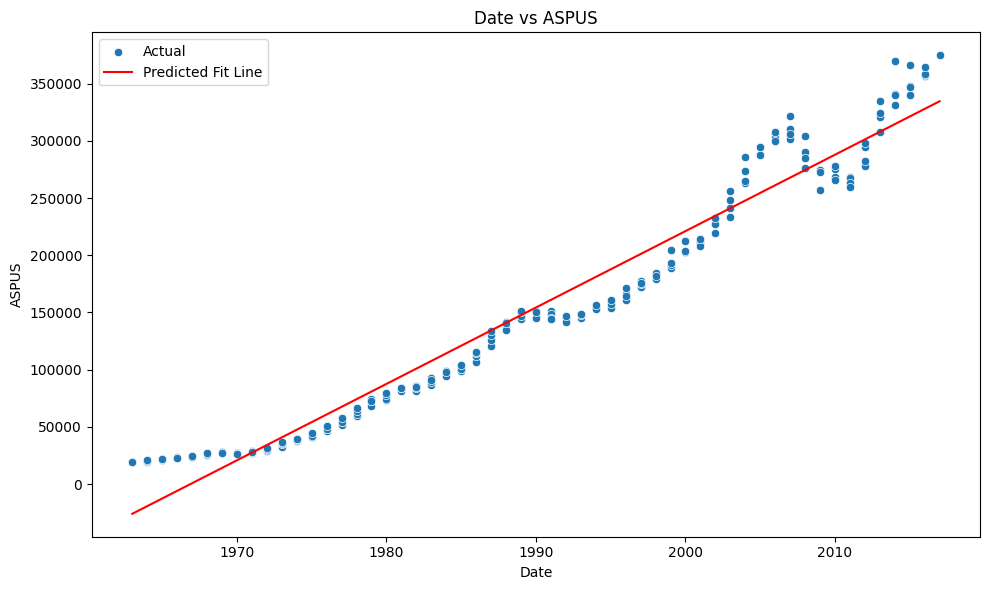

In [1057]:
# Creating the model fit line
pred_x_2 = np.linspace(x_mod_2['Date'].min(), x_mod_2['Date'].max(), 100).reshape(-1, 1)
pred_y_2 = model_2.predict(pred_x_2)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(x='Date', y='ASPUS', data=pred_model_data_year_2, ax=axes, label='Actual')

axes.plot(pred_x_2, pred_y_2, color='red', label='Predicted Fit Line')

axes.set_title('Date vs ASPUS')
axes.set_xlabel('Date')
axes.set_ylabel('ASPUS')
axes.legend()

plt.tight_layout()
plt.show()


In [1058]:
pred_x_2 = np.array([[2025],   
                  [2050]]) 

pred_y_2 = model_2.predict(pred_x_2)

for i in range(len(pred_x_2)):
    print(f"Prediction for Average House Sold Price in {pred_x_2[i][0]}: ${pred_y_2[i][0]:.2f}")

Prediction for Average House Sold Price in 2025: $388040.68
Prediction for Average House Sold Price in 2050: $555001.24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



## <font color='lightblue'>Results</font>

### I am going to use the above plots and outputs as references for this section's comments.

Up front, it is clear these datasets used would not be good data sets to try to predict housing sales prices, and fed rates based on those two and the political party in office.  This is due to a few reasons:
1. Through analyis (EDA), it is clear that there is a weak correlation, if any, between political party & fed rates/house prices.
2. I think it can be seen there is some correlation (dependence) between fed rates and house sale prices, but again, it's not very strong in my opinion, by itself.

<ins>Effective Fed Rate, HSN1F, is_Republican, is_Democrat vs ASPUS Model (model 1):</ins>

Mean Absolute Error: 59919.09849867125    
Mean Squared Error: 6007520499.813061  
Root Mean Squared Error: 77508.19633956825  
RMSE_1 Normalized: 0.513153669135513  
R^2 Score: 0.3379885479625877  
Coefficients: [[-16682.82120553   61.41325322  -3226.37945743   3226.37945743]]  

These are poor model performance metrics in my opinion.  For example, the MAE & MSE show drastic errors in predictions (i.e. $59,919 for MAE).  The RMSE normalized also isn't great (far from close to 0) and I would imagine would be way too high for a production model.

Prediction for Average House Sold Price at 6.2% fed rate: $117474.29  
Prediction for Average House Sold Price at 6.2% fed rate: $123927.05

The model did an 'ok' job of trying to fit a line to the data, given the features being input.  I don't think it's surprising that this isn't a better fitting line, given that there was only some correlation between fed rate and ASPUS and the lack of correlation of party and ASPUS in the EDA section of this project (where there was minimal to no correlation between the two).  That being said, I do think it did a pretty good job of prediction in my two sample inputs (verified by comparing to the historical trends of ASPUS vs. Fed Rates).  This is certinaly not something I think should be put into production, but for educational purposes, I thought this was valuable.

<ins>Date vs ASPUS Model (model 2):</ins>

Mean Absolute Error: 18985.018002601977  
Mean Squared Error: 489844225.0002655  
Root Mean Squared Error: 22132.42474290301  
RMSE Normalized: 0.1465307606169688  
R^2 Score: 0.9460205775952563  
Coefficients: [[6678.42255032]]    

Notice that all of these performance metrics are much better than my first model.  This is likely due to the strong linear correlation between dates and ASPUS.

Prediction for Average House Sold Price in 2025: $388040.68  
Prediction for Average House Sold Price in 2050: $555001.24

You can see that this is a good/classic example of linear regression.  The data, as seen in the analysis above this section, is linear and the model does a much better job of trying to fit the data with prediction.  I think the prediction outputs of $388,040.68 for 2025 and $550,001.24 make sense given the historical trend in increasing house prices IN THIS DATASET.  I don't think they are accurate in real-world though, given the massive spike in home prices since 2017, especially during/after COVID, which would drastically change (increase) these predictions.

<ins>Thoughts on possible approaches to improve model performance:</ins>
- finding new datasets that have a strong correlation to fed rates & ASPUS, for example house data (i.e. # of bedrooms, sq. footage, etc.)
- instead of using political party as a predictor feature, create a logistic regression model to use other features to predict the party - though this wouldn't be very helpful.



## <font color='lightblue'>Discussion</font>


<ins>Findings:</ins>

**Presidencies/Party Correlation On Fed Rate:**

<font color='red'>REJECT NULL HYPOTHESIS:</font>  Although there may be a slight correlation between higher fed rates during Republican presidencies, I would argue that the data/trends are not clear enough to definitively or even comfortably make that assertion.  Overall, the Fed Rate has increased/decreased for both presidential parties.

**Presidencies/Party Correlation On One Family Homes Sold:**  

<font color='red'>REJECT NULL HYPOTHESIS:</font>  The data does not reflect any indicators that Presidencies/parties have a direct effect on the number of one family homes sold.  That being said, there was a very clear relationship (inverse) between the fed rate and homes sold.  When the fed rate was lower, more homes were sold and vice versa, when the fed rate was higher, less homes were sold. This makes sense given that higher fed rates lead to higher mortgage rates, which can be a barrier or discourager for some people looking to buy a home.

**Presidencies/Party Correlation On the Average Price of Home Sales:**  

<font color='red'>REJECT NULL HYPOTHESIS:</font>  By far the easiest/clearest hypothesis to reject, the data shows a postiive linear relationship and demonstrated that average home sale prices have consistently continued to rise since the earliest data point (1963) in my data set, with minor exceptions such as the 2008-2009 housing market crash.


<ins>There are few limitation to this analysis / these datasets:</ins>
- This analysis was limited to data up to 2017 (7 years ago), meaning that for this type of data (fed rate & housing stats), this is not ideal and not very reliable.  A lot of things have happended and changed over the past 7 years, including Covid, housing / building supply shortages, fed rates sharply increasing, and home prices seeing all-time highs.  In real-world application/analysis, it would be highly recommended to get the most up-to-date dataset, but these were the available free data sets I could find for this project.

- In regard to political party impact on fed rates/housing sales & sale prices, a key concern I had going into this was the limited number predictor variables for presidencies/parties.  Although there have been almost 50 presidents over the course of the country's history, this dataset was limited to only 1963-2017 (only 10 Presidencies).  It's common that many ML models are suggested to use at minimum 100 learning samples to train with, which is significnatly higher than we have here.  

<ins>Future Possibilities:</ins>

Based on the findings above, I don't think there is much value in continuing to explore relationships between presidencies/parties and the fed rate/housing sales.  That being said, I do think there is possibly value in continuing to explore fed rates, homes sold, and average prices of homes sold.  There were clearly relationships between these data sets and I think it could be really helpful to be able to predict things such as:

- Predicting fed rates for a specific year in the future based on historical trends
- Predicting how much the average cost of a house would be for a specific year in the future
- Predicting future housing market trends (such as increased/decreased home sales)
- Creating a logistic regression model that took house prices & fed rate and tried to predict the party (though not sure how useful this would be)
- Many others...